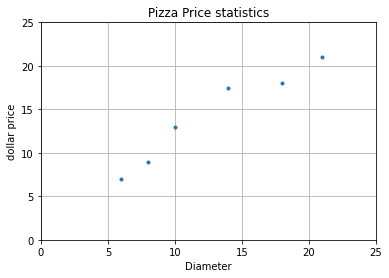

In [1]:
import matplotlib.pyplot as plt

x = [[6], [8], [10], [14], [18], [21]]
y = [[7], [9], [13], [17.5], [18], [21]]

plt.figure()
plt.title('Pizza Price statistics')
plt.xlabel('Diameter')
plt.ylabel('dollar price')
plt.plot(x,y,'.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

## Simple Linear Regression

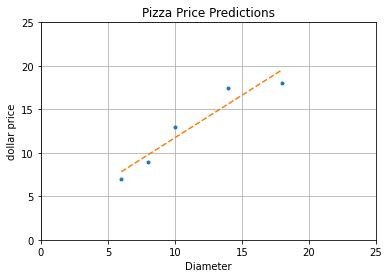

[[22.46767241]]


In [2]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(x,y)

plt.figure()
plt.title('Pizza Price Predictions')
plt.xlabel('Diameter')
plt.ylabel('dollar price')
plt.plot(x,y,'.')
plt.plot(x,model.predict(x),'--')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

print (model.predict([[21]]))

## Loss Function

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy.linalg import inv,lstsq
from numpy import dot, transpose

x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(x,y)

print ('Residual sum of squares = ',np.mean((model.predict(x)- y) ** 2))
print ('Variance = ',np.var([6, 8, 10, 14, 18], ddof=1))
print ('Co-variance = ',np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

Residual sum of squares =  1.7495689655172406
Variance =  23.2
Co-variance =  22.650000000000002


## R-Sequred Score

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy.linalg import inv,lstsq
from numpy import dot, transpose

x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(x,y)

x_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

print ('R-squared score = ',model.score(x_test, y_test))

R-squared score =  0.6620052929422553


## Multiple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import lstsq

x = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(x,y)

x1 = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y1 = [[11], [8.5], [15], [18], [11]]

predictions = model.predict(x1)
for i, prediction in enumerate(predictions):
    print ((prediction, y1[i]))

print (lstsq(x, y, rcond=None)[0])

print ('R-squared score = ',model.score(x1, y1))

(array([10.0625]), [11])
(array([10.28125]), [8.5])
(array([13.09375]), [15])
(array([18.14583333]), [18])
(array([13.3125]), [11])
[[1.08548851]
 [0.65517241]]
R-squared score =  0.7701677731318468


## Pandas 

In [8]:
import pandas as pd

df = pd.read_csv('input_data.csv')

# Understanding data
print (df.shape)
print (df.columns)
print(df.head(5))
print(df.info())
print(df.describe())
print(df.groupby('LotShape').size())

# Dropping null value columns which cross the threshold
a = df.isnull().sum()
print (a)
b =  a[a>(0.05*len(a))]
print (b)
df = df.drop(b.index, axis=1)
print (df.shape)

# Replacing null value columns (text) with most used value
a1 = df.select_dtypes(include=['object']).isnull().sum()
print (a1)
print (a1.index)
for i in a1.index:
    b1 = df[i].value_counts().index.tolist()
    print (b1)
    df[i] = df[i].fillna(b1[0])

# Replacing null value columns (int, float) with most used value
a2 = df.select_dtypes(include=['integer','float']).isnull().sum()
print (a2)
b2 = a2[a2!=0].index 
print (b2)
modes = df[b2].mode().to_dict(orient='records')
if len(modes) > 0:
    df = df.fillna(modes[0])

# Creating new columns from existing columns
print (df.shape)
a3 = df['YrSold'] - df['YearBuilt']
b3 = df['YrSold'] - df['YearRemodAdd']
df['Years Before Sale'] = a3
df['Years Since Remod'] = b3
print (df.shape)

# Dropping unwanted columns
df = df.drop(["Id", "MoSold", "SaleCondition", "SaleType", "YearBuilt", "YearRemodAdd"], axis=1) 
print (df.shape)

# Dropping columns which has correlation with target less than threshold
target='SalePrice'
x = df.select_dtypes(include=['integer','float']).corr()[target].abs()
print (x)  
df=df.drop(x[x<0.4].index, axis=1)
print (df.shape)

# Checking for the necessary features after dropping some columns
l1 = ["PID","MS SubClass","MS Zoning","Street","Alley","Land Contour","Lot Config","Neighborhood",
      "Condition 1","Condition 2","Bldg Type","House Style","Roof Style","Roof Matl","Exterior 1st",
      "Exterior 2nd","Mas Vnr Type","Foundation","Heating","Central Air","Garage Type","Misc Feature",
      "Sale Type","Sale Condition"]
l2 = []
for i in l1:
    if i in df.columns:
        l2.append(i)
       
 #Getting rid of nominal columns with too many unique values
for i in l2:
    len(df[i].unique())>10
    df=df.drop(i, axis=1)
print (df.columns)

df.to_csv('output_data.csv',index=False)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

['TA', 'Gd', 'Ex', 'Fa']
['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev']
['Y', 'N', 'P']
['WD', 'New', 'COD', 'ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con']
['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand']
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
Index([], dtype='object')
(1460, 63)
(1460, 65)
(1460, 59)
MSSubClass           0.084284
LotAr

## Model input/output data and pickle file.

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'Years Before Sale', 'Years Since Remod', 'SalePrice'],
      dtype='object')
Number of predictions: 365
Mean Squared Error: 1683466974.746262
Root Mean Squared Error: 41030.0740280378
Scoring: 0.7767124842469847


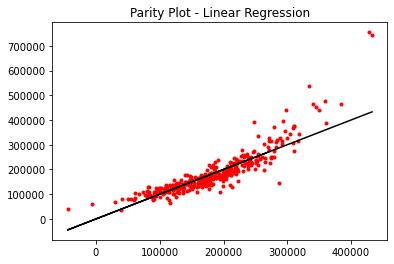

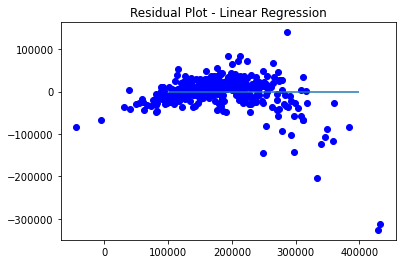

['output_salepricemodel.pkl']

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
#from sklearn.externals import joblib
import joblib
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import os

df = pd.read_csv('output_data.csv')

i = list(df.columns.values)
i.pop(i.index('SalePrice'))
df0 = df[i+['SalePrice']]
df = df0.select_dtypes(include=['integer','float'])
print (df.columns)

X = df[list(df.columns)[:-1]]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_predictions = regressor.predict(X_test)

meanSquaredError=mean_squared_error(y_test, y_predictions)
rootMeanSquaredError = sqrt(meanSquaredError)

print("Number of predictions:",len(y_predictions))
print("Mean Squared Error:", meanSquaredError)
print("Root Mean Squared Error:", rootMeanSquaredError)
print ("Scoring:",regressor.score(X_test, y_test))

plt.plot(y_predictions,y_test,'r.') 
plt.plot(y_predictions,y_predictions,'k-') 
plt.title('Parity Plot - Linear Regression')
plt.show()

plot = plt.scatter(y_predictions, (y_predictions - y_test), c='b')
plt.hlines(y=0, xmin= 100000, xmax=400000)
plt.title('Residual Plot - Linear Regression')
plt.show()

joblib.dump(regressor, 'output_salepricemodel.pkl')

## Prediction on input/output and pickle, json

In [11]:
import json

# Prepare the data
data = {
    "OverallQual":[7],
    "TotalBsmtSF":[856],
    "1stFlrSF":[856],
    "GrLivArea":[1710],
    "FullBath":[2],
    "TotRmsAbvGrd":[8],
    "Fireplaces":[0],
    "GarageCars":[2],
    "GarageArea":[548],
    "Years Before Sale":[5],
    "Years Since Remod":[5]    
}

# Specify the file path and name
file_path = "C:/Users/Admin/input.json"

# Open the file in write mode
with open(file_path, 'w') as json_file:
    # Write the data as JSON
    json.dump(data, json_file)

# File created successfully
print("JSON file created.")

JSON file created.


In [13]:
import os 
import json
import pandas as pd
import numpy
#from sklearn.externals import joblib
import joblib

s = pd.read_json('input.json')
p = joblib.load("output_salepricemodel.pkl")
r = p.predict(s)
print (str(r))

[210550.8027625]


In [14]:
import os 
import json
import pandas as pd
import numpy
from flask import Flask, render_template, request, jsonify
from pandas.io.json import json_normalize
#from sklearn.externals import joblib
import joblib

app = Flask(__name__)
port = int(os.getenv('PORT', 5500))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/api/salepricemodel', methods=['POST'])
def salepricemodel():
    if request.method == 'POST':
        try:
            post_data = request.get_json()
            json_data = json.dumps(post_data)
            s = pd.read_json(json_data)          
            p = joblib.load("output_salepricemodel.pkl")
            r = p.predict(s)
            return str(r) 
        
        except Exception as e:
            return (e)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=port, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

df = pd.read_csv('output_data.csv')

i = list(df.columns.values)
i.pop(i.index('SalePrice'))
df0 = df[i + ['SalePrice']]
df = df0.select_dtypes(include=['integer', 'float'])

X = df[list(df.columns)[:-1]]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y)

def linear():
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def ridge():
    regressor = Ridge(alpha=0.3, normalize=True)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def lasso():
    regressor = Lasso(alpha=0.00009, normalize=True)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def elasticnet():
    regressor = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def randomforest():
    regressor = RandomForestRegressor(n_estimators=15, min_samples_split=15, criterion='mse', max_depth=None)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for RandomForest:", regressor.feature_importances_)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def perceptron():
    regressor = MLPRegressor(hidden_layer_sizes=(5000,), activation='relu', solver='adam', max_iter=1000)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Coefficients of Perceptron:", regressor.coefs_)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def decisiontree():
    regressor = DecisionTreeRegressor(min_samples_split=30, max_depth=None)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for DecisionTree:", regressor.feature_importances_)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def adaboost():
    regressor = AdaBoostRegressor(random_state=8, loss='exponential')
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for AdaBoost:", regressor.feature_importances_)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def extratrees():
    regressor = ExtraTreesRegressor(n_estimators=50)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for ExtraTrees:", regressor.feature_importances_)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

def gradientboosting():
    regressor = GradientBoostingRegressor(loss='ls', n_estimators=500, min_samples_split=15)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for GradientBoosting:", regressor.feature_importances_)
    return regressor.score(X_test, y_test), sqrt(mean_squared_error(y_test, y_predictions))

print("Score, RMSE values")
print("Linear =", linear())
print("Ridge =", ridge())
print("Lasso =", lasso())
print("ElasticNet =", elasticnet())
print("RandomForest =", randomforest())
print("Perceptron =", perceptron())
print("DecisionTree =", decisiontree())
print("AdaBoost =", adaboost())
print("ExtraTrees =", extratrees())
print("GradientBoosting =", gradientboosting())

Score, RMSE values
Linear = (0.8182178182166804, 34866.60296321034)
Ridge = (0.8054207260367505, 36073.000666625376)
Lasso = (0.8182178103192395, 34866.60372059187)
ElasticNet = (0.8181192239106916, 34876.05708706729)
Selected Features for RandomForest: [0.63450578 0.09381529 0.03323273 0.11711888 0.00878517 0.00959487
 0.01408235 0.01359338 0.030312   0.02054806 0.02441148]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

RandomForest = (0.8662460090756656, 29907.998842545683)
Coefficients of Perceptron: [array([[ 1.39564275e+00, -1.52133160e-02,  1.92897073e+00, ...,
         5.61071656e-03, -2.80500921e-02,  1.36665239e+00],
       [ 6.46592926e-02, -6.91687997e-83,  1.15377885e-02, ...,
         3.25020006e-03,  1.63515296e-02,  6.34744429e-02],
       [ 1.00848016e-01, -1.53519902e-02,  7.58186224e-02, ...,
         8.47476312e-03, -3.48477055e-02,  1.37871774e-01],
       ...,
       [ 1.84486542e-01,  7.13464229e-82,  2.37438780e-01, ...,
         7.59617254e-03, -2.31767999e-02,  2.00608352e-01],
       [-2.90547063e-01, -1.53452587e-02, -5.45801285e-01, ...,
         2.00391408e-03,  1.79968408e-02, -3.30870828e-01],
       [-4.91170769e-01, -1.59450655e-02, -8.00754734e-01, ...,
        -4.03756807e-02, -1.63766576e-02, -5.09656818e-01]]), array([[ 0.14248838],
       [ 0.01506398],
       [ 0.17189591],
       ...,
       [-0.004931  ],
       [-0.01005716],
       [ 0.14383741]])]
Perceptron 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Selected Features for GradientBoosting: [0.53209641 0.11476383 0.04737377 0.13751723 0.01817214 0.00578659
 0.02359445 0.03125981 0.02464976 0.03027731 0.03450871]
GradientBoosting = (0.884506377360196, 27791.56365592052)
